<a href="https://colab.research.google.com/github/vovparya/Urban_University/blob/master/%D0%9E%D0%B1%D0%B7%D0%BE%D1%80_%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%BD%D1%8B%D1%85_%D0%BD%D0%B0%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%98%D0%98_%D0%94_%D0%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Домашнее задание по теме "Обзор основных направлений ИИ"

Канни Эдж Детектор (Canny Edge Detector) — это один из самых известных и широко используемых алгоритмов для обнаружения границ в изображениях.


###Этапы работы Канни Эдж Детектора

1. **Сглаживание изображения (Noise Reduction)**: Первым шагом является применение гауссового фильтра для снижения шумов в изображении. Это делает границы более четкими.

2. **Градиентное преобразование (Gradient Computation)**: Вычисление градиентов изображения, чтобы определить направление и величину изменений интенсивности. Обычно используются операторы Собеля для этого этапа.

3. **Ненаправленное подавление (Non-Maximum Suppression)**: В этом этапе выделяются только те пиксели, которые являются локальными максимумами вдоль направления градиента. Это помогает избавиться от менее выраженных границ.

4. **Двойной порог (Double Thresholding)**: Установка двух пороговых значений для определения сильных и слабых границ. Пиксели, которые превышают высокий порог, считаются границами, а те, что между двумя порогами, будут проверены на связь с сильными границами.

5. **Связывание границ (Edge Tracking by Hysteresis)**: Связывание слабых границ с сильными для окончательного определения границ. Слабые границы, которые соединяются с сильными, считаются границами.

###Пример реализации Канни Эдж Детектора на Python

Вот пример кода на Python, который использует библиотеку OpenCV для реализации Канни Эдж Детектора:



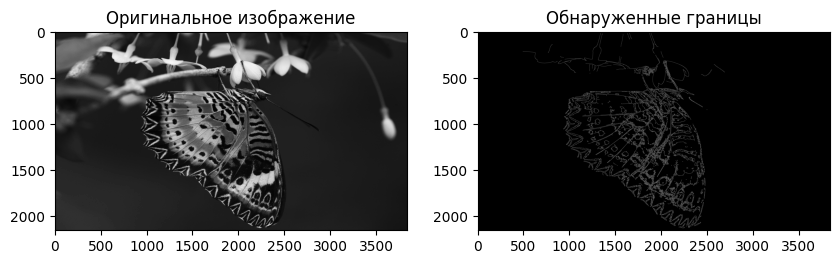

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('/content/ED.jpg', cv2.IMREAD_GRAYSCALE)

# Применение гауссового фильтра для снижения шумов
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Применение Канни Эдж Детектора
edges = cv2.Canny(blurred_image, 50, 150)
# 50 и 150 - это  high threshold и low threshold —
# два пороговых значения, которые используются
# для определения сильных и слабых границ на изображении.

# Отображение результата
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Оригинальное изображение')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Обнаруженные границы')
plt.imshow(edges, cmap='gray')

plt.show()

### Домашнее задание

Создайте текстовую ячейку в блокноте и напишите в ней свое понимание ответов на следующие вопросы:

1. **Объясните этапы работы Канни Эдж Детектора. Почему каждый этап важен для общего алгоритма?**   

2. **Как выбор значений для двойного порога (high и low threshold) влияет на результаты работы Канни Эдж Детектора?**
   - Поэксперементируйте с примером кода и опишите свои наблюдения.

3. **Используйте Канни Эдж Детектор для различных изображений и сравните результаты. **

4. **Используйте приведенный ниже код для визуализации градиентов в изображении. Подумайте: как можно использовать эти градиенты для других задач в компьютерном зрении?**

5. Сохраните свой блокнот, расшарьте его и направьте ссылку на ваш блокнот на проверку преподавателю.

#NB! Не забудьте загрузить в колаб изображения для тестирования (используйте фотографии из своих источников или интернета).
Замените в коде ссылки на изображения, использованные преподавателем, на ваши. Как это сделать - показано в лекции.


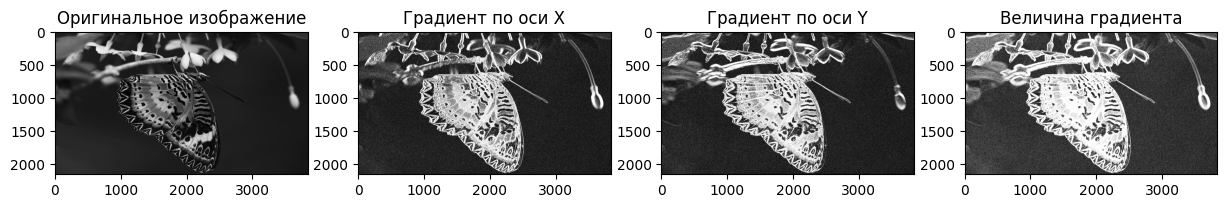

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('/content/ED.jpg', cv2.IMREAD_GRAYSCALE)

# Применение оператора Собеля для вычисления градиентов по осям X и Y
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Градиент по оси X
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Градиент по оси Y

# Вычисление величины градиента
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Нормализация градиентов для отображения
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

# Отображение результатов
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Оригинальное изображение')
plt.imshow(image, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Градиент по оси X')
plt.imshow(sobel_x, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Градиент по оси Y')
plt.imshow(sobel_y, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Величина градиента')
plt.imshow(gradient_magnitude, cmap='gray')

plt.show()
